In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import h5py
from psana import *

In [2]:
ls /reg/d/psdm/tmo/tmolx0819/scratch/xiangli/

preprocess.err  PreProc.py   run_11.h5
preprocess.out  PreProc.sh*  run_11_part0.h5


In [3]:
data = h5py.File('/reg/d/psdm/tmo/tmolx0819/scratch/xiangli/run_11.h5','r')

In [6]:
data.keys()

<KeysViewHDF5 ['evt', 'h_pks', 'h_pks_padded', 'n_pks', 'n_pks_padded', 'num_evt', 't_pks', 't_pks_padded', 'timestamp', 'wf', 'wf_pks']>

<IPython.core.display.Javascript object>


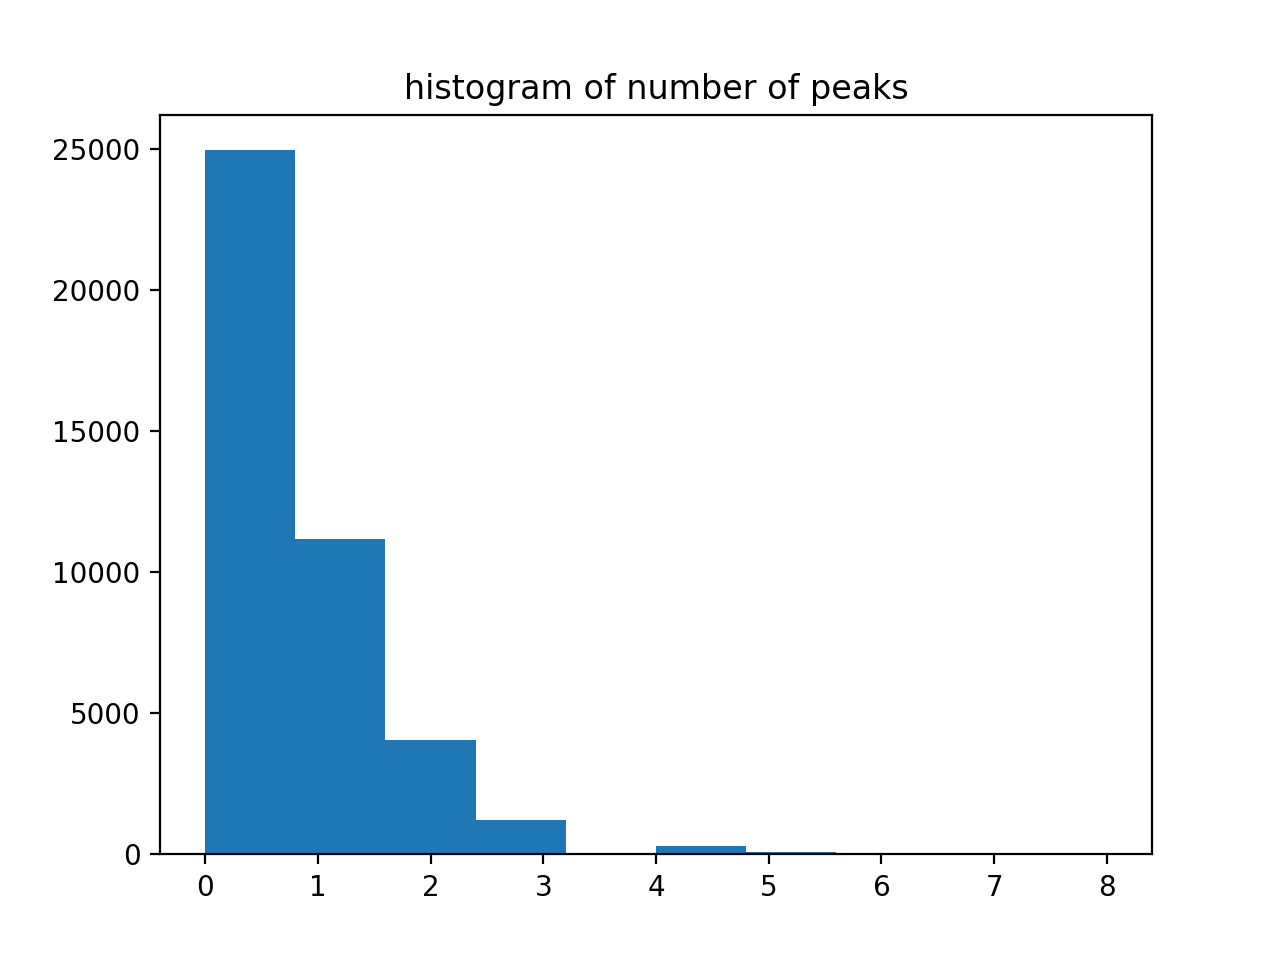

Text(0.5, 1.0, 'histogram of number of peaks')

In [20]:
num_hits = np.sum(~np.isnan(data['t_pks_padded'][:]),axis=1)
plt.figure()
_=plt.hist(num_hits)
plt.title('histogram of number of peaks')

In [6]:
tbins = np.arange(0,len(data['wf'][:]))*0.167

htof,_ = np.histogram(data['t_pks_padded'][:],bins=tbins)

<IPython.core.display.Javascript object>


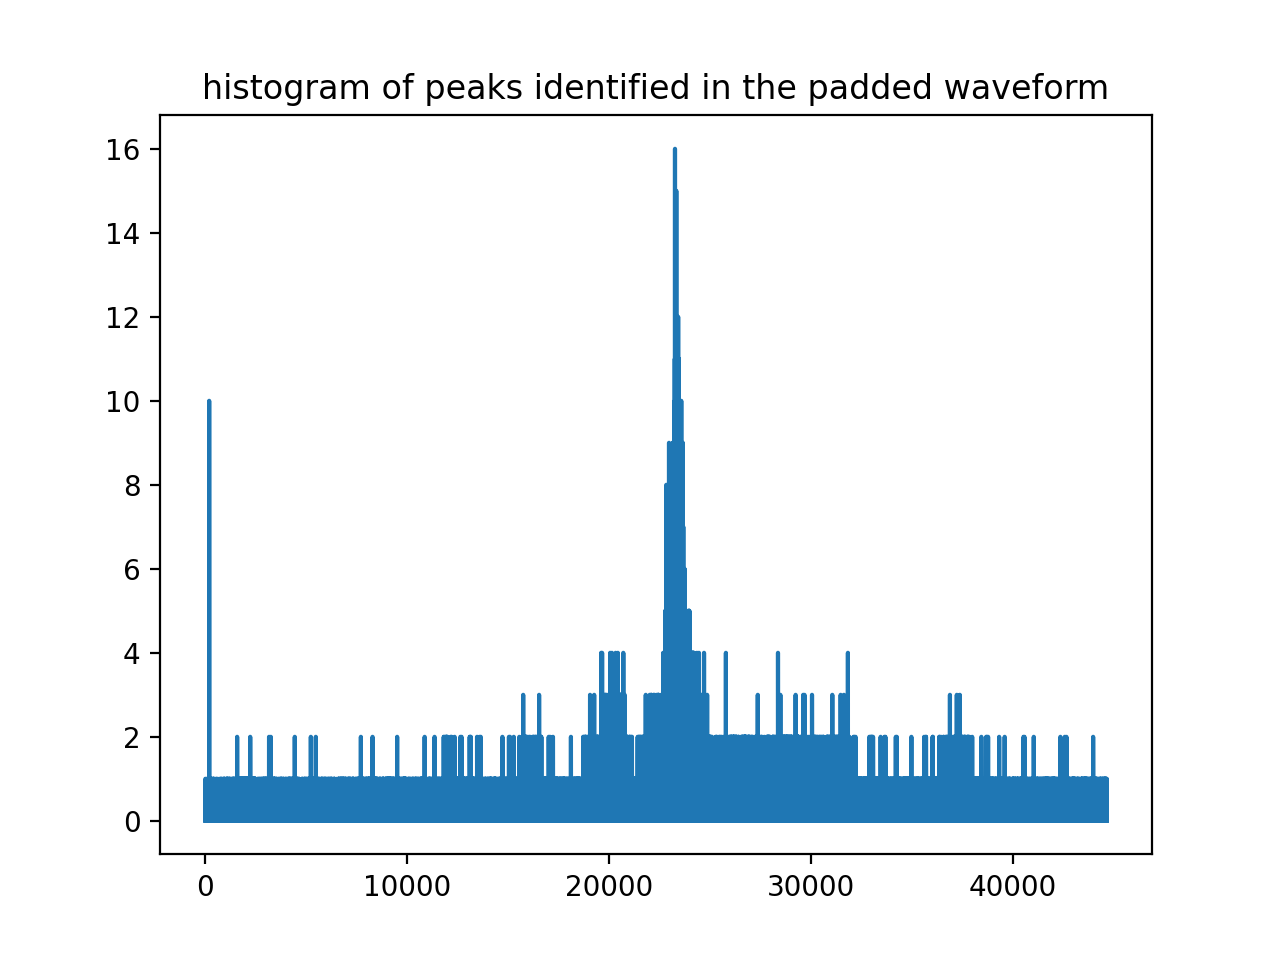

Text(0.5, 1.0, 'histogram of peaks identified in the padded waveform')

In [16]:
plt.figure()
plt.plot(tbins[1:],htof)
plt.title('histogram of peaks identified in the padded waveform')

<IPython.core.display.Javascript object>


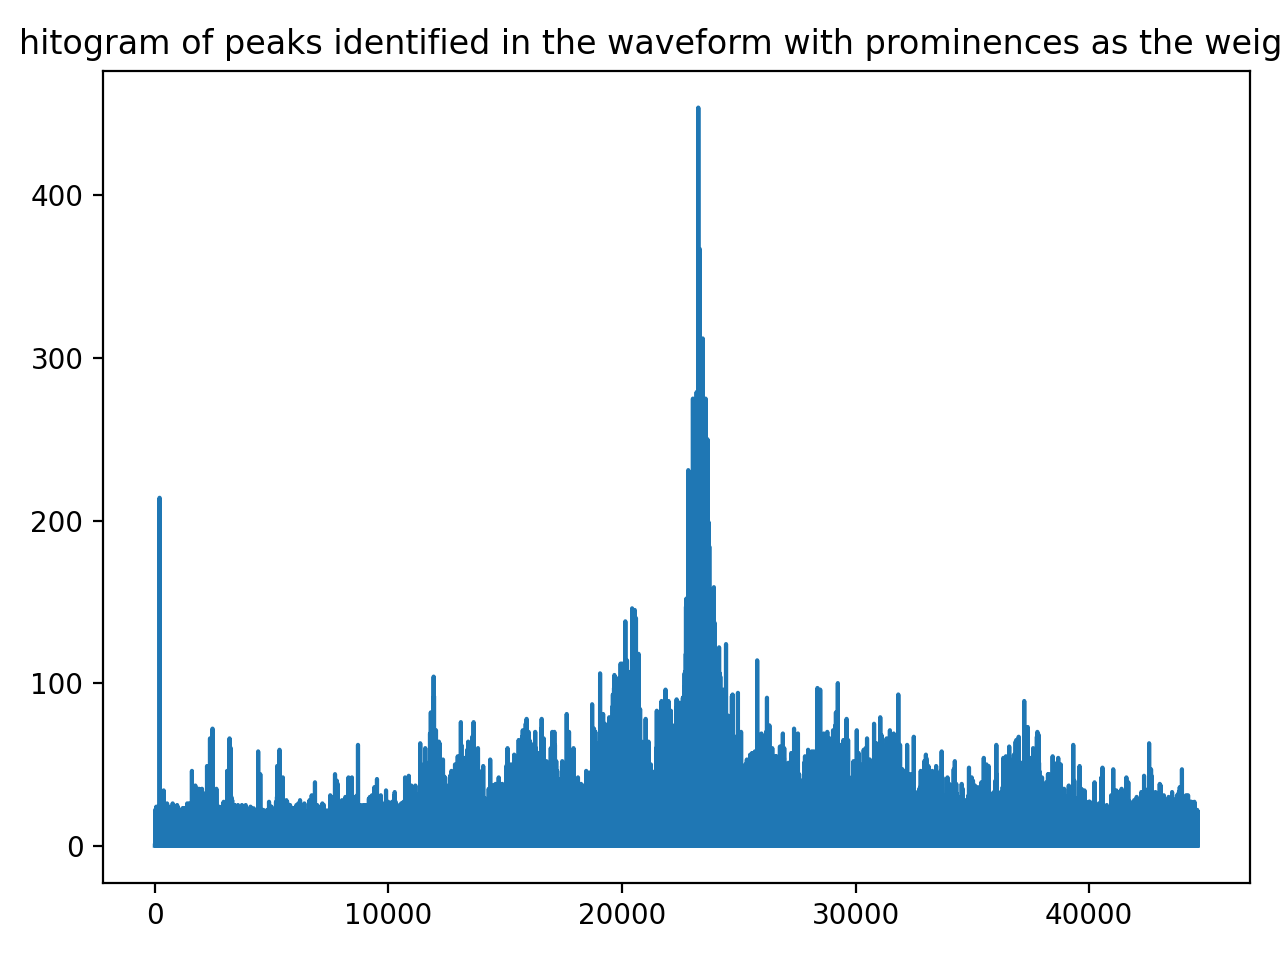

In [18]:
htof_prom,_ = np.histogram(data['t_pks_padded'][:],bins=tbins,
                      weights=data['h_pks_padded'][:])

plt.figure()
plt.plot(tbins[1:],htof_prom)
plt.title('hitogram of peaks identified in the waveform with prominences as the weights')
plt.tight_layout()

<IPython.core.display.Javascript object>


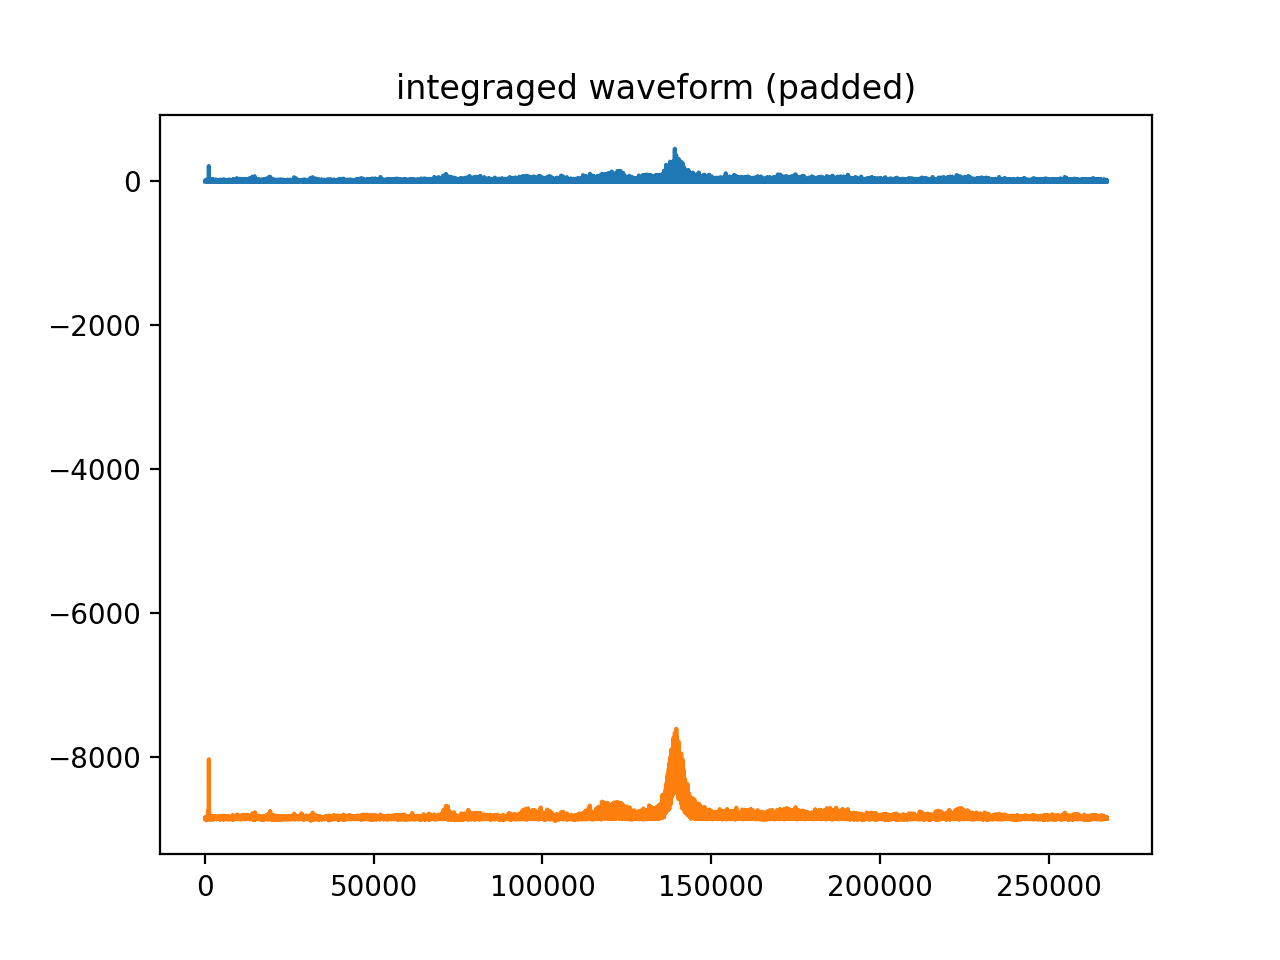

Text(0.5, 1.0, 'integraged waveform (padded)')

In [15]:
plt.figure()
plt.plot(data['wf_pks'][100:-10])
plt.plot(data['wf'][100:-10])
plt.title('integraged waveform (padded)')

In [7]:
data['evt'].shape

(41802, 256)

<IPython.core.display.Javascript object>


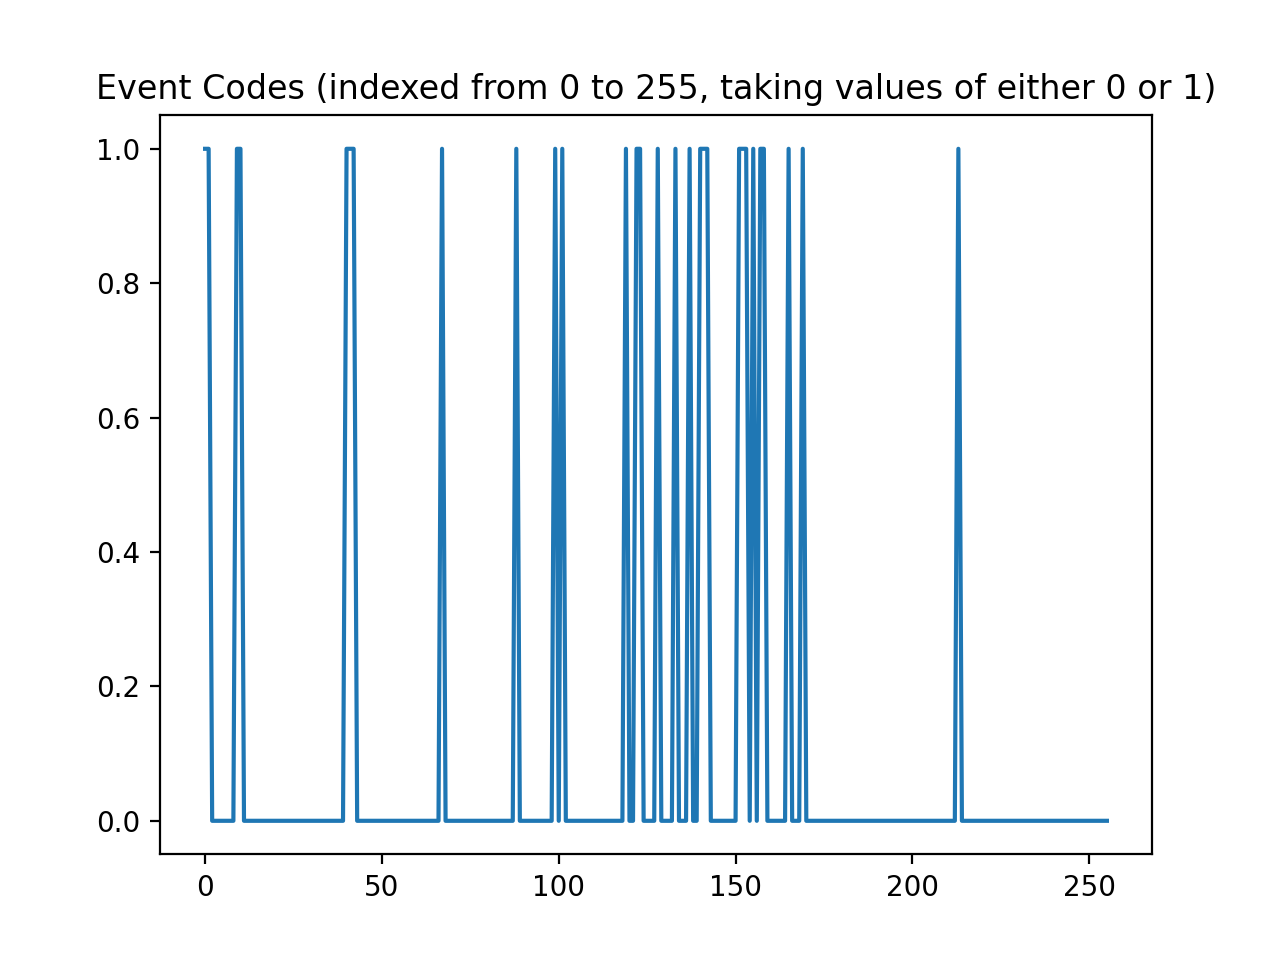

Text(0.5, 1.0, 'Event Codes (indexed from 0 to 255, taking values of either 0 or 1)')

In [10]:
plt.figure()
plt.plot(data['evt'][0])
plt.title('Event Codes (indexed from 0 to 255, taking values of either 0 or 1)')